# Convertendo o arquivo txt para csv


In [ ]:
import pandas as pd


In [ ]:
# Definindo os intervalos de largura fixa e os nomes das colunas
colspecs = [
    (0, 2),
    (2, 10),
    (10, 12),
    (12, 24),
    (24, 27),
    (27, 39),
    (39, 49),
    (49, 52),
    (52, 56),
    (56, 69),
    (69, 82),
    (82, 95),
    (95, 108),
    (108, 121),
    (121, 134),
    (134, 147),
    (147, 152),
    (152, 170),
    (170, 188),
    (188, 201),
    (201, 202),
    (202, 210),
    (210, 217),
    (217, 230),
    (230, 242),
    (242, 245)
]

names = ["TIPO_REGISTRO", "DATA", "CODBDI", "CODNEG", "TPMERC", "NOMRES", "ESPECI", "PRAZOT", "MODREF", "PREABE", "PREMAX", "PREMIN", "PREMED", "PREULT", "PREOFC", "PREOFV", "TOTNEG", "QUATOT", "VOLTOT", "PREEXE", "INDOPC", "DATVEN", "FATCOT", "PTOEXE", "CODISI", "DISMES"]

# Lendo o arquivo de largura fixa
df = pd.read_fwf('/content/drive/MyDrive/B3/data/raw/COTAHIST_A2008.txt', colspecs=colspecs, names=names, header=None, skiprows=1)

# Eliminando a última linha
df = df.iloc[:-1]

# Descartando a primeira coluna (é só o tipo do registro: 00 - Header; 01 - Cotações dos papéis por dia; 99 - Trailer)
df = df.drop(columns=["TIPO_REGISTRO"])

# Convertendo a coluna 'data' para o formato "YYYY-MM-DD"
df['DATA'] = pd.to_datetime(df['DATA'], format='%Y%m%d')

df.head()

,DATA,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,PREMAX,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
0,2008-04-28,2.0,TIBR6,10,MILLENNIUM,PNB,NaN,R$,9.0,10.0,...,5.0,500000.0,4800000.0,0.0,0.0,99991231.0,1.0,0.0,BRTIBRACNPB1,43.0
1,2008-04-28,96.0,TIBR6F,20,MILLENNIUM,PNB,NaN,R$,10.0,10.0,...,10.0,92050.0,920530.0,0.0,0.0,99991231.0,1.0,0.0,BRTIBRACNPB1,43.0
2,2008-04-28,62.0,TIBR6T,30,MILLENNIUM,PNB,120.0,R$,10.0,11.0,...,2.0,20000.0,208340.0,0.0,0.0,99991231.0,1.0,0.0,BRTIBRACNPB1,43.0
3,2008-04-28,96.0,TKNO4F,20,TEKNO,PN EDB,NaN,R$,9499.0,9499.0,...,2.0,10.0,113990.0,0.0,0.0,99991231.0,1.0,0.0,BRTKNOACNPR5,43.0
4,2008-04-28,2.0,TLPP3,10,TELESP,ON,NaN,R$,3850.0,3850.0,...,56.0,34200.0,129781800.0,0.0,0.0,99991231.0,1.0,0.0,BRTLPPACNOR8,128.0


In [ ]:
# Salvando como .csv
df.to_csv('/content/drive/MyDrive/B3/data/processed/base_transacoes_2008.csv', index=False)

# Feature Engineering

> Montando uma ABT

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
df_transacoes = spark.read.csv("/content/drive/MyDrive/B3/data/processed/base_transacoes_2008.csv",
                               header=True,
                               inferSchema=True)

## Habilitando uso do SparkSQL
df_transacoes.createOrReplaceTempView("df_transacoes")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_transacoes.show(5,False)

+----------+------+------+------+----------+-------+------+------+------+------+------+------+------+------+------+------+--------+----------+------+------+-----------+------+------+------------+------+
|DATA      |CODBDI|CODNEG|TPMERC|NOMRES    |ESPECI |PRAZOT|MODREF|PREABE|PREMAX|PREMIN|PREMED|PREULT|PREOFC|PREOFV|TOTNEG|QUATOT  |VOLTOT    |PREEXE|INDOPC|DATVEN     |FATCOT|PTOEXE|CODISI      |DISMES|
+----------+------+------+------+----------+-------+------+------+------+------+------+------+------+------+------+------+--------+----------+------+------+-----------+------+------+------------+------+
|2008-04-28|2.0   |TIBR6 |10    |MILLENNIUM|PNB    |null  |R$    |9.0   |10.0  |9.0   |9.0   |10.0  |9.0   |10.0  |5.0   |500000.0|4800000.0 |0.0   |0.0   |9.9991231E7|1.0   |0.0   |BRTIBRACNPB1|43.0  |
|2008-04-28|96.0  |TIBR6F|20    |MILLENNIUM|PNB    |null  |R$    |10.0  |10.0  |9.0   |9.0   |10.0  |9.0   |10.0  |10.0  |92050.0 |920530.0  |0.0   |0.0   |9.9991231E7|1.0   |0.0   |BRTIBR

### Criando flags de janela para histórico:
- últimos 3 meses
- últimos 6 meses
- últimos 12 meses

In [ ]:
df_temp_01 = spark.sql("""
SELECT
    *,
      CASE
        WHEN DATA BETWEEN DATE_ADD(MAX(DATA) OVER (PARTITION BY CODNEG), -90) AND MAX(DATA) OVER (PARTITION BY CODNEG) THEN 1
        ELSE 0
    END AS ultimos_3_meses_flag,
    CASE
        WHEN DATA BETWEEN DATE_ADD(MAX(DATA) OVER (PARTITION BY CODNEG), -180) AND MAX(DATA) OVER (PARTITION BY CODNEG) THEN 1
        ELSE 0
    END AS ultimos_6_meses_flag,
    CASE
        WHEN DATA BETWEEN DATE_ADD(MAX(DATA) OVER (PARTITION BY CODNEG), -365) AND MAX(DATA) OVER (PARTITION BY CODNEG) THEN 1
        ELSE 0
    END AS ultimos_12_meses_flag
FROM df_transacoes
ORDER BY CODNEG;
""")
df_temp_01.createOrReplaceTempView("df_temp_01")
df_temp_01.count()

186595

In [ ]:
df_temp_01.show(10,False)


+----------+------+------+------+----------+----------+------+------+------+------+------+------+------+------+------+------+---------+-----------+------+------+-----------+------+------+------------+------+--------------------+--------------------+---------------------+
|DATA      |CODBDI|CODNEG|TPMERC|NOMRES    |ESPECI    |PRAZOT|MODREF|PREABE|PREMAX|PREMIN|PREMED|PREULT|PREOFC|PREOFV|TOTNEG|QUATOT   |VOLTOT     |PREEXE|INDOPC|DATVEN     |FATCOT|PTOEXE|CODISI      |DISMES|ultimos_3_meses_flag|ultimos_6_meses_flag|ultimos_12_meses_flag|
+----------+------+------+------+----------+----------+------+------+------+------+------+------+------+------+------+------+---------+-----------+------+------+-----------+------+------+------------+------+--------------------+--------------------+---------------------+
|2008-05-13|2.0   |ABCB4 |10    |ABC BRASIL|PN      N2|null  |R$    |1000.0|1000.0|966.0 |984.0 |975.0 |975.0 |980.0 |83.0  |504800.0 |4.96566E8  |0.0   |0.0   |9.9991231E7|1.0   |0.0 

### Criando variáveis explicativas de primeira camada

In [ ]:
df_temp_02 = spark.sql("""
select
    CODNEG,
    round(sum(PREABE),2) as PREABE_TOT,
    round(avg(PREABE),2) as PREABE_MED,
    round(max(PREABE),2) as PREABE_MAX,
    round(min(PREABE),2) as PREABE_MIN,
    round(sum(case when CODBDI = 2 then PREABE else 0 end),2) as PREABE_TOT_LOTE_PADRAO,
    round(avg(case when CODBDI = 2 then PREABE else NULL end),2) as PREABE_MED_LOTE_PADRAO,
    round(avg(case when CODBDI = 2 and ultimos_3_meses_flag = 1 then PREABE else NULL end),2) as PREABE_MED_U3M_LOTE_PADRAO,
    round(avg(case when CODBDI = 2 and ultimos_6_meses_flag = 1 then PREABE else NULL end),2) as PREABE_MED_U6M_LOTE_PADRAO,
    round(avg(case when CODBDI = 2 and ultimos_12_meses_flag = 1 then PREABE else NULL end),2) as PREABE_MED_U12M_LOTE_PADRAO
from df_temp_01
group by CODNEG
order by CODNEG
""")

df_temp_02.createOrReplaceTempView("df_temp_02")
df_temp_02.count()

5311

In [ ]:
df_temp_02.show()

+-------+----------+----------+----------+----------+----------------------+----------------------+--------------------------+--------------------------+---------------------------+
| CODNEG|PREABE_TOT|PREABE_MED|PREABE_MAX|PREABE_MIN|PREABE_TOT_LOTE_PADRAO|PREABE_MED_LOTE_PADRAO|PREABE_MED_U3M_LOTE_PADRAO|PREABE_MED_U6M_LOTE_PADRAO|PREABE_MED_U12M_LOTE_PADRAO|
+-------+----------+----------+----------+----------+----------------------+----------------------+--------------------------+--------------------------+---------------------------+
|  ABCB4|  118756.0|    698.56|    1150.0|     281.0|              118756.0|                698.56|                    389.35|                    600.22|                     698.56|
| ABCB4F|   85583.0|    731.48|    1199.0|     295.0|                   0.0|                  null|                      null|                      null|                       null|
| ABCB4T|   19093.0|    561.56|    1092.0|     304.0|                   0.0|              

### Criando variáveis explicativas de segunda camada

In [ ]:
df_temp_03 = spark.sql("""
Select
  *,
  round(PREABE_MED_U3M_LOTE_PADRAO/PREABE_MED_U6M_LOTE_PADRAO,2) as PREABE_RAZ_MED_U3M_U6M_LOTE_PADRAO,
  round(PREABE_MED_U6M_LOTE_PADRAO/PREABE_MED_U12M_LOTE_PADRAO,2) as PREABE_RAZ_MED_U6M_U12M_LOTE_PADRAO
from df_temp_02

""")

df_temp_03.createOrReplaceTempView("df_temp_03")
df_temp_03.count()

5311

In [ ]:
df_temp_03.show()

+-------+----------+----------+----------+----------+----------------------+----------------------+--------------------------+--------------------------+---------------------------+----------------------------------+-----------------------------------+
| CODNEG|PREABE_TOT|PREABE_MED|PREABE_MAX|PREABE_MIN|PREABE_TOT_LOTE_PADRAO|PREABE_MED_LOTE_PADRAO|PREABE_MED_U3M_LOTE_PADRAO|PREABE_MED_U6M_LOTE_PADRAO|PREABE_MED_U12M_LOTE_PADRAO|PREABE_RAZ_MED_U3M_U6M_LOTE_PADRAO|PREABE_RAZ_MED_U6M_U12M_LOTE_PADRAO|
+-------+----------+----------+----------+----------+----------------------+----------------------+--------------------------+--------------------------+---------------------------+----------------------------------+-----------------------------------+
|  ABCB4|  118756.0|    698.56|    1150.0|     281.0|              118756.0|                698.56|                    389.35|                    600.22|                     698.56|                              0.65|                         

In [ ]:
abt_temp_01 = spark.sql("""
    Select
        b.*,
        date_format(CURRENT_DATE, 'yyyyMM') as PK_DATREF,
        CURRENT_DATE as PK_DAT_PROC
    from
        df_temp_03 as b

""")

abt_temp_01.count()

5311

In [ ]:
abt = abt_temp_01

abt.show()

+-------+----------+----------+----------+----------+----------------------+----------------------+--------------------------+--------------------------+---------------------------+----------------------------------+-----------------------------------+---------+-----------+
| CODNEG|PREABE_TOT|PREABE_MED|PREABE_MAX|PREABE_MIN|PREABE_TOT_LOTE_PADRAO|PREABE_MED_LOTE_PADRAO|PREABE_MED_U3M_LOTE_PADRAO|PREABE_MED_U6M_LOTE_PADRAO|PREABE_MED_U12M_LOTE_PADRAO|PREABE_RAZ_MED_U3M_U6M_LOTE_PADRAO|PREABE_RAZ_MED_U6M_U12M_LOTE_PADRAO|PK_DATREF|PK_DAT_PROC|
+-------+----------+----------+----------+----------+----------------------+----------------------+--------------------------+--------------------------+---------------------------+----------------------------------+-----------------------------------+---------+-----------+
|  ABCB4|  118756.0|    698.56|    1150.0|     281.0|              118756.0|                698.56|                    389.35|                    600.22|                     6

In [163]:
abt.write.partitionBy("PK_DATREF").parquet("/content/drive/MyDrive/B3/data/processed/ABT")

### Gerando amostra aleatória

In [164]:
# Amostra sem reposição: 10% da população total
sampled_abt = abt.sample(False, 0.1)
sampled_abt.count()

510

In [165]:
sampled_abt.show()

+--------+----------+----------+----------+----------+----------------------+----------------------+--------------------------+--------------------------+---------------------------+----------------------------------+-----------------------------------+---------+-----------+
|  CODNEG|PREABE_TOT|PREABE_MED|PREABE_MAX|PREABE_MIN|PREABE_TOT_LOTE_PADRAO|PREABE_MED_LOTE_PADRAO|PREABE_MED_U3M_LOTE_PADRAO|PREABE_MED_U6M_LOTE_PADRAO|PREABE_MED_U12M_LOTE_PADRAO|PREABE_RAZ_MED_U3M_U6M_LOTE_PADRAO|PREABE_RAZ_MED_U6M_U12M_LOTE_PADRAO|PK_DATREF|PK_DAT_PROC|
+--------+----------+----------+----------+----------+----------------------+----------------------+--------------------------+--------------------------+---------------------------+----------------------------------+-----------------------------------+---------+-----------+
|  ABYA3F|  138073.0|    836.81|    2010.0|     111.0|                   0.0|                  null|                      null|                      null|                  

In [166]:
abt.count()

5311

## **DATA PREP**

In [167]:
# import pandas as pd

# Ler diretório Parquet
abt_00 = pd.read_parquet('/content/drive/MyDrive/B3/data/processed/ABT', engine='pyarrow')
abt_00.shape

(5311, 14)

In [178]:
abt_00.head()


,CODNEG,PREABE_TOT,PREABE_MED,PREABE_MAX,PREABE_MIN,PREABE_TOT_LOTE_PADRAO,PREABE_MED_LOTE_PADRAO,PREABE_MED_U3M_LOTE_PADRAO,PREABE_MED_U6M_LOTE_PADRAO,PREABE_MED_U12M_LOTE_PADRAO,PREABE_RAZ_MED_U3M_U6M_LOTE_PADRAO,PREABE_RAZ_MED_U6M_U12M_LOTE_PADRAO,PK_DAT_PROC,PK_DATREF
0,ABCB4,118756.0,698.56,1150.0,281.0,118756.0,698.56,389.35,600.22,698.56,0.65,0.86,2023-09-19,202309
1,ABCB4F,85583.0,731.48,1199.0,295.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-19,202309
2,ABCB4T,19093.0,561.56,1092.0,304.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-19,202309
3,ABCP11,17645.0,705.80,790.0,542.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-19,202309
4,ABNB3,247353.0,1455.02,1808.0,979.0,247353.0,1455.02,1082.45,1366.83,1455.02,0.79,0.94,2023-09-19,202309


In [169]:
# Salvando arquivo como csv
abt_00.to_csv('/content/drive/MyDrive/B3/data/processed/abt_00_cotacao.csv')

### Tratamento inicial
- Separar uma parte dos dados (30%) para testes e validações
- reservar lista de variaveis para retirar de tratamentos

In [183]:
from sklearn.model_selection import train_test_split

# Dividindo o DataFrame em treino e teste
abt_01, abt_01_test = train_test_split(abt_00, test_size=0.3, random_state=42)


abt_01.shape,abt_01_test.shape, abt_00.shape

((3717, 14), (1594, 14), (5311, 14))

In [185]:
# lista de vars para retirar dos tratamentos

lista_spec = ['CODNEG', 'PK_DAT_PROC','PK_DATREF']

abt_01 = abt_01.drop(axis=1,columns = lista_spec)
abt_01.shape



(3717, 11)

In [186]:
abt_01.head()


,PREABE_TOT,PREABE_MED,PREABE_MAX,PREABE_MIN,PREABE_TOT_LOTE_PADRAO,PREABE_MED_LOTE_PADRAO,PREABE_MED_U3M_LOTE_PADRAO,PREABE_MED_U6M_LOTE_PADRAO,PREABE_MED_U12M_LOTE_PADRAO,PREABE_RAZ_MED_U3M_U6M_LOTE_PADRAO,PREABE_RAZ_MED_U6M_U12M_LOTE_PADRAO
643,4688.0,586.00,642.0,566.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3562,3600.0,3600.00,3600.0,3600.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3101,2366.0,91.00,175.0,45.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1068,98.0,98.00,98.0,98.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3151,7766.0,554.71,855.0,300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
abt_01.columns

Index(['PREABE_TOT', 'PREABE_MED', 'PREABE_MAX', 'PREABE_MIN',
       'PREABE_TOT_LOTE_PADRAO', 'PREABE_MED_LOTE_PADRAO',
       'PREABE_MED_U3M_LOTE_PADRAO', 'PREABE_MED_U6M_LOTE_PADRAO',
       'PREABE_MED_U12M_LOTE_PADRAO', 'PREABE_RAZ_MED_U3M_U6M_LOTE_PADRAO',
       'PREABE_RAZ_MED_U6M_U12M_LOTE_PADRAO'],
      dtype='object')

### Metadados


In [ ]:
def pod_academy_generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='percent_nulos',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata



# def pod_academy_generate_metadata(dataframe):
#     """
#     Gera um dataframe contendo metadados das colunas do dataframe fornecido, incluindo um teste de normalidade.

#     :param dataframe: DataFrame para o qual os metadados serão gerados.
#     :return: DataFrame contendo metadados.
#     """

#     # Coleta de metadados básicos
#     metadata = pd.DataFrame({
#         'nome_variavel': dataframe.columns,
#         'tipo': dataframe.dtypes,
#         'qt_nulos': dataframe.isnull().sum(),
#         'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
#         'cardinalidade': dataframe.nunique(),
#     })

#     # Função para testar normalidade usando o teste de Shapiro-Wilk
#     def test_normality(series, alpha=0.05):
#         if series.dtype in ["float64", "int64","int32"]:
#             statistic, p_value = stats.shapiro(series.dropna())  # dropping NA values for the test
#             return p_value > alpha
#         else:
#             return None  # Return None for non-numeric data types

#     # Aplicando teste de normalidade
#     metadata["fl_normal"] = dataframe.apply(test_normality)

#     metadata = metadata.sort_values(by='percent_nulos', ascending=False)
#     metadata = metadata.reset_index(drop=True)

#     return metadata



In [188]:
#### Vamos obter o metadados referente à nossa ABT
metadata_df = pod_academy_generate_metadata(abt_01)
metadata_df.head(100)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,PREABE_MED_LOTE_PADRAO,float64,3318,89.27,398
1,PREABE_MED_U3M_LOTE_PADRAO,float64,3318,89.27,397
2,PREABE_MED_U6M_LOTE_PADRAO,float64,3318,89.27,398
3,PREABE_MED_U12M_LOTE_PADRAO,float64,3318,89.27,398
4,PREABE_RAZ_MED_U3M_U6M_LOTE_PADRAO,float64,3318,89.27,74
5,PREABE_RAZ_MED_U6M_U12M_LOTE_PADRAO,float64,3318,89.27,46
6,PREABE_TOT,float64,0,0.00,2729
7,PREABE_MED,float64,0,0.00,2935
8,PREABE_MAX,float64,0,0.00,1832
9,PREABE_MIN,float64,0,0.00,1463


### Tratamento dos valores nulos

<Axes: >

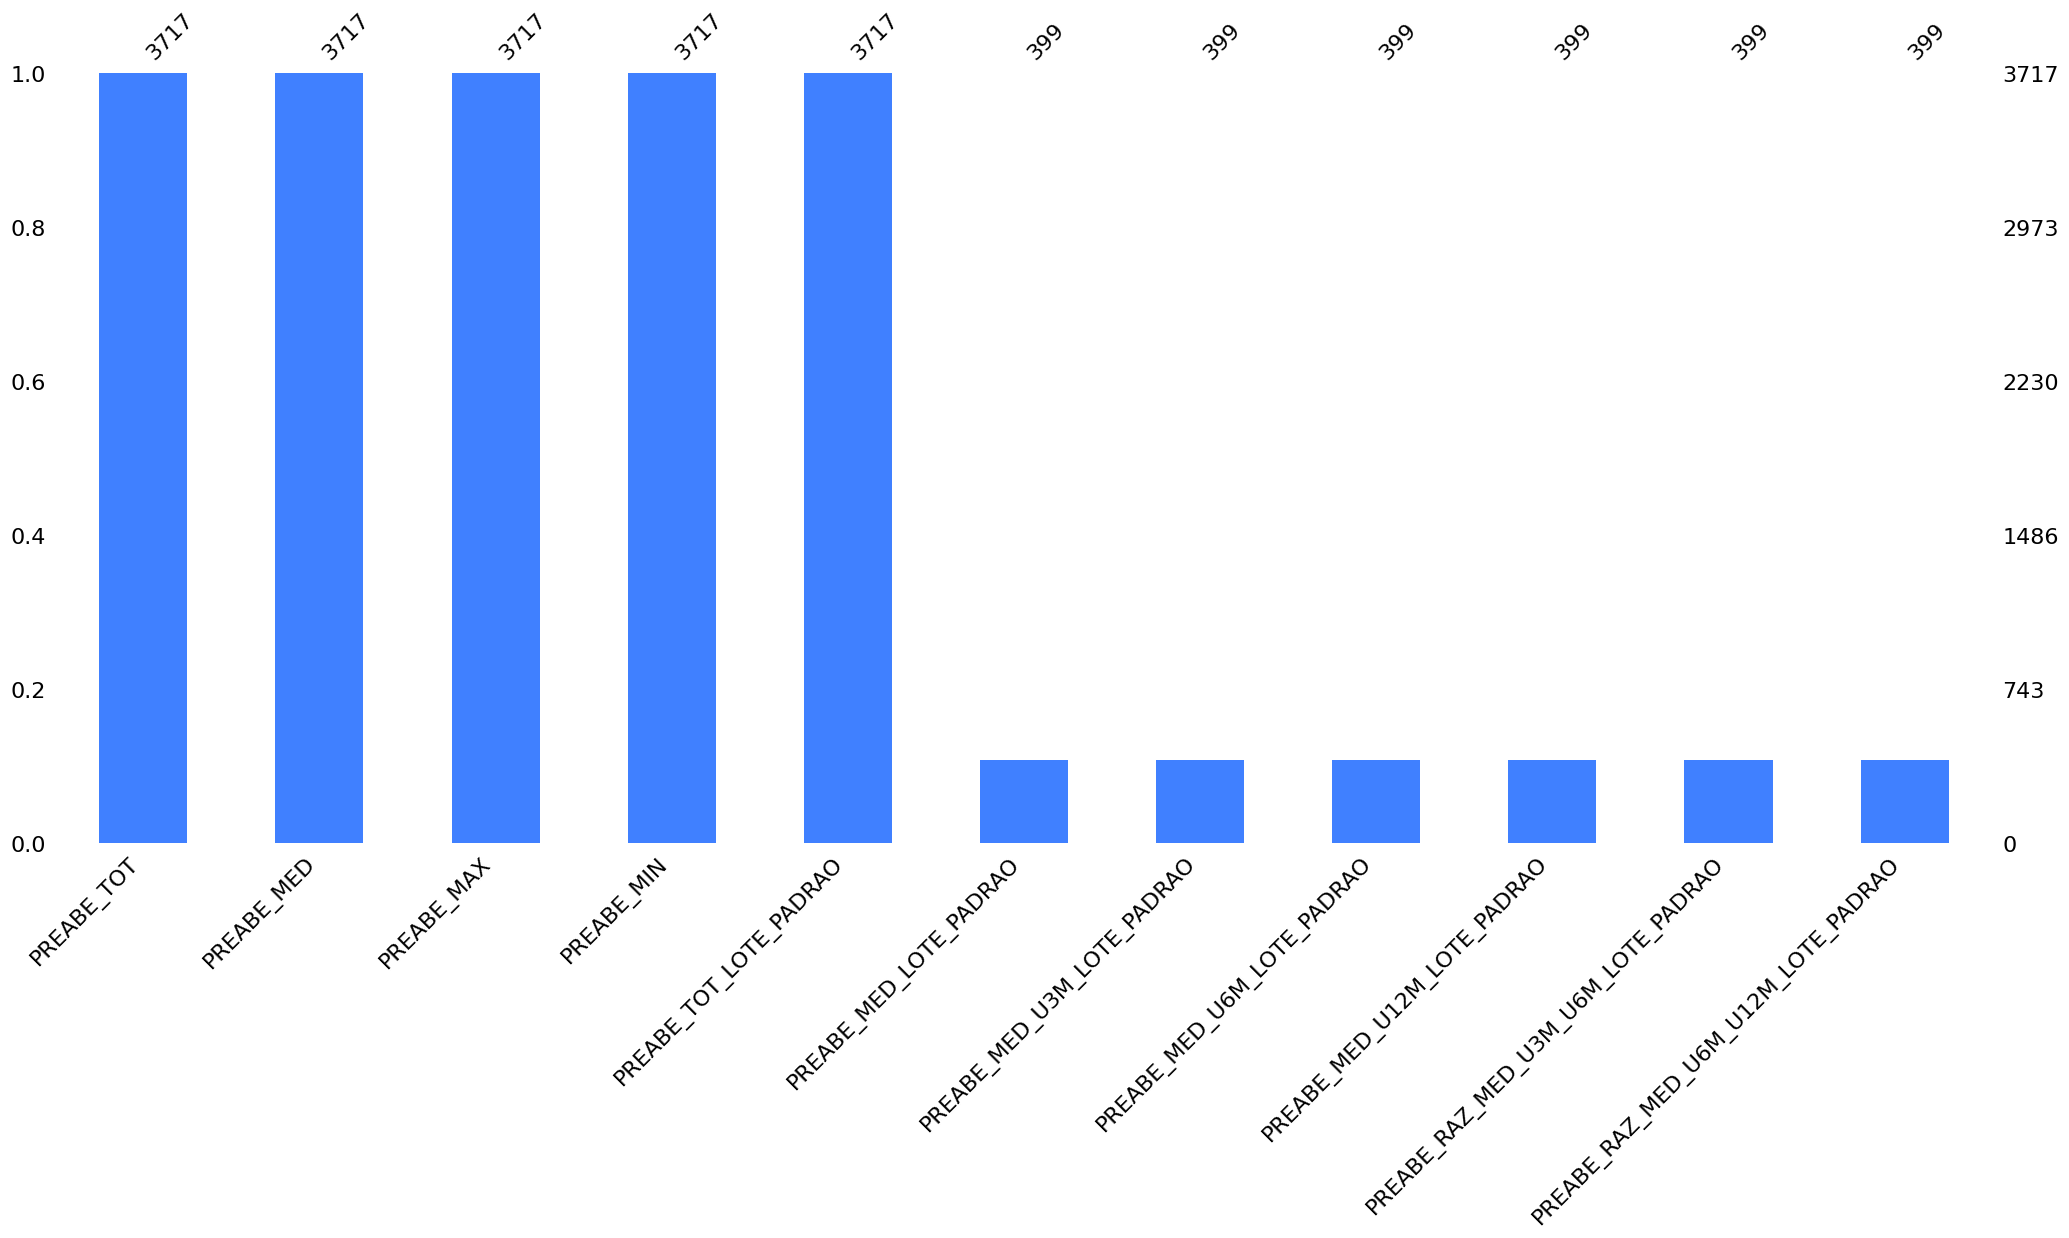

In [189]:
import missingno as msno
# msno.matrix(abt_01, color=(0.25, 0.5, 1))  # tom de azul claro
msno.bar(abt_01, color=(0.25, 0.5, 1))  # tom de azul claro


In [190]:
# Variáveis numéricas
# Filtrando o DataFrame
missing_cutoff = 70
df_numericas_drop_nulos = metadata_df[(metadata_df['percent_nulos'] >= missing_cutoff)]
lista_drop_nulos_numericas = list(df_numericas_drop_nulos.nome_variavel.values)
lista_drop_nulos_numericas

['PREABE_MED_LOTE_PADRAO',
 'PREABE_MED_U3M_LOTE_PADRAO',
 'PREABE_MED_U6M_LOTE_PADRAO',
 'PREABE_MED_U12M_LOTE_PADRAO',
 'PREABE_RAZ_MED_U3M_U6M_LOTE_PADRAO',
 'PREABE_RAZ_MED_U6M_U12M_LOTE_PADRAO']

In [191]:
# retirando lista de variáveis com alto percentual de nulos
abt_02 = abt_01.drop(axis=1,columns=lista_drop_nulos_numericas)
abt_02.shape

(3717, 5)

In [192]:
# substituindo nulos pela média da variável numérica
abt_02 = abt_02.fillna(abt_02.select_dtypes(include=['float64', 'int64','int32']).mean())
abt_02.shape

(3717, 5)

In [193]:
abt_02.head()

,PREABE_TOT,PREABE_MED,PREABE_MAX,PREABE_MIN,PREABE_TOT_LOTE_PADRAO
643,4688.0,586.00,642.0,566.0,0.0
3562,3600.0,3600.00,3600.0,3600.0,0.0
3101,2366.0,91.00,175.0,45.0,0.0
1068,98.0,98.00,98.0,98.0,0.0
3151,7766.0,554.71,855.0,300.0,0.0


In [194]:
# substituindo nulos por "Desconhecido" para categóricas
categorical_cols = abt_02.select_dtypes(include=['object']).columns
abt_02[categorical_cols] = abt_02[categorical_cols].fillna('Desconhecido')
abt_02.shape

(3717, 5)

In [195]:
abt_02.head()

,PREABE_TOT,PREABE_MED,PREABE_MAX,PREABE_MIN,PREABE_TOT_LOTE_PADRAO
643,4688.0,586.00,642.0,566.0,0.0
3562,3600.0,3600.00,3600.0,3600.0,0.0
3101,2366.0,91.00,175.0,45.0,0.0
1068,98.0,98.00,98.0,98.0,0.0
3151,7766.0,554.71,855.0,300.0,0.0


<Axes: >

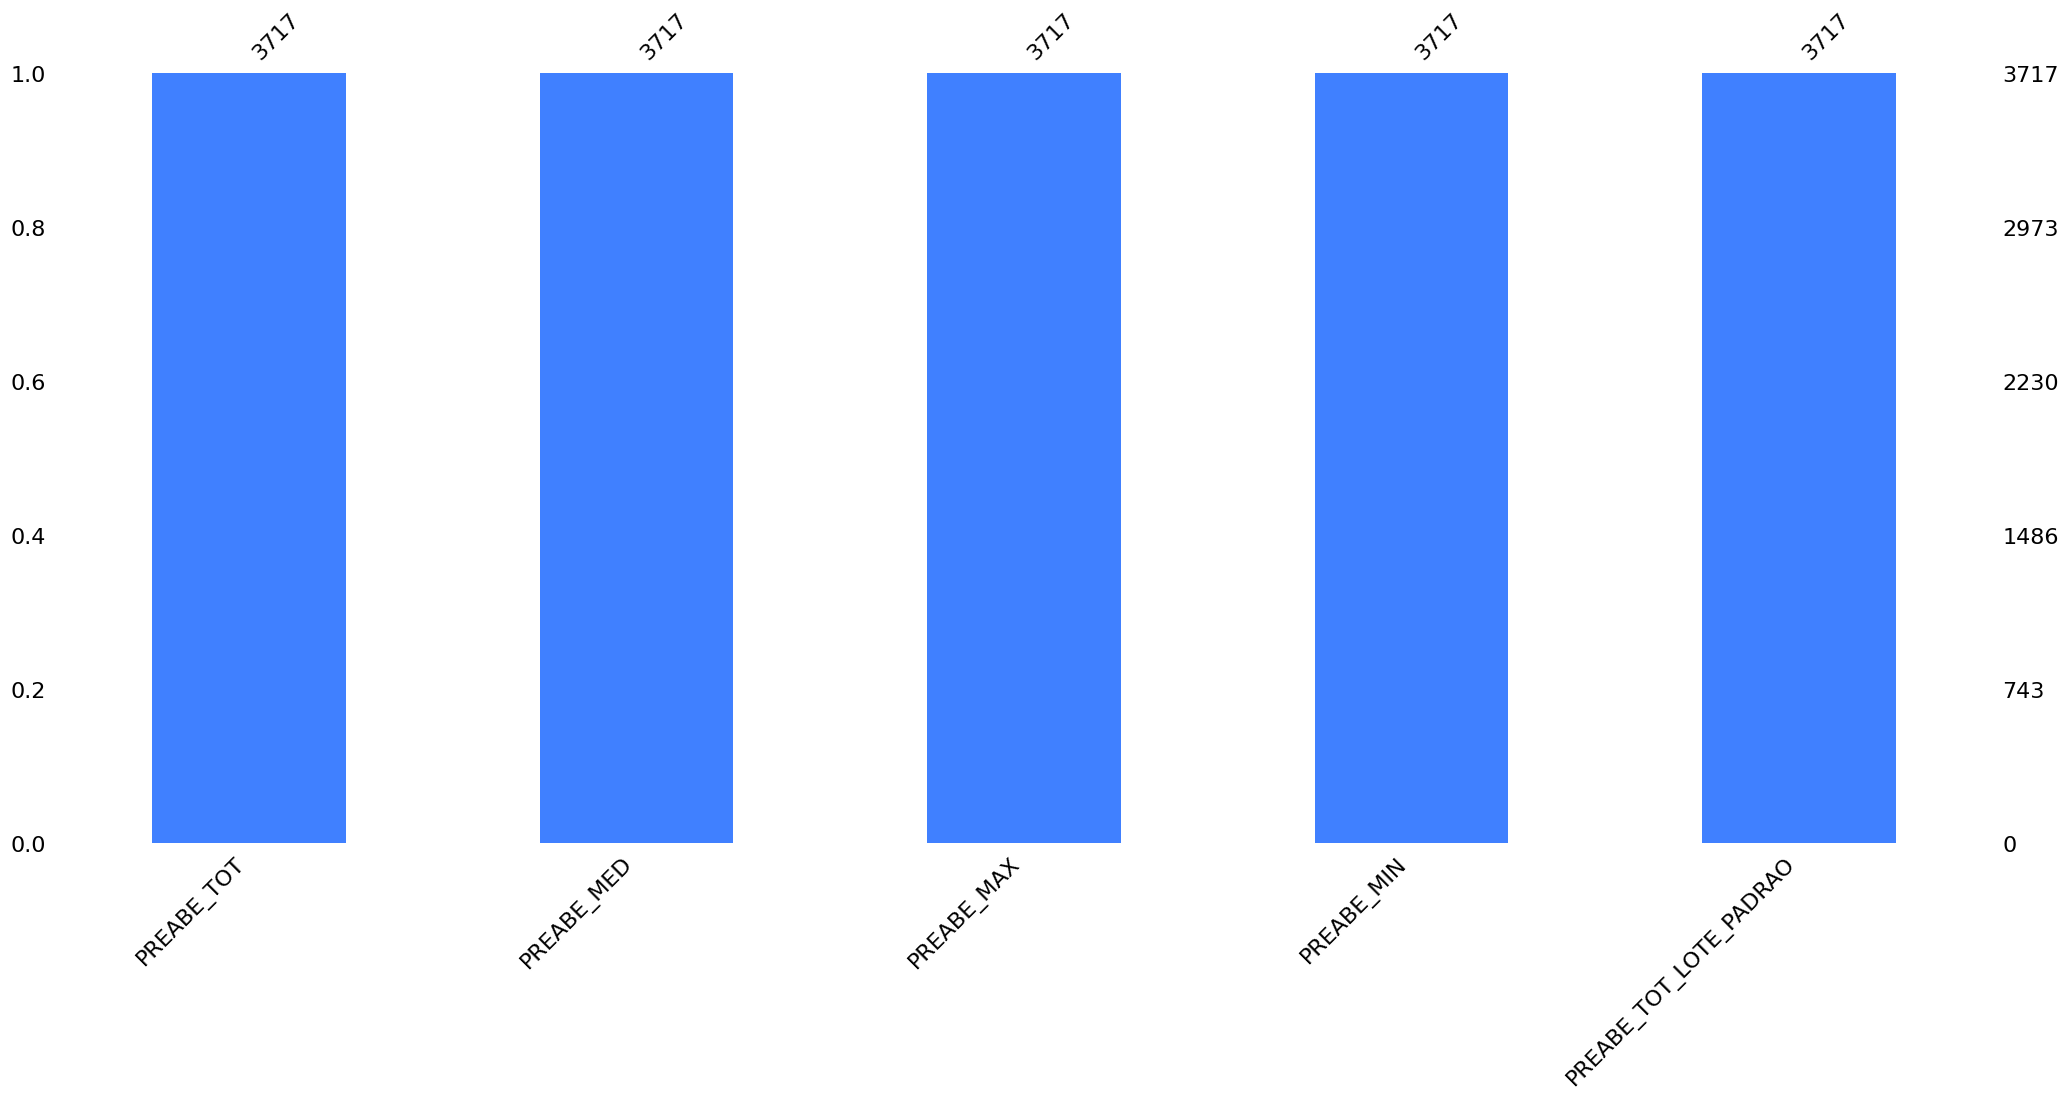

In [196]:
msno.bar(abt_02, color=(0.25, 0.5, 1))  # tom de azul claro

In [197]:
# copiando dataframes para exemplos ludicos utilizando diferentes normalizações nos dados
abt_03 = abt_02.copy()
abt_04 = abt_02.copy()
abt_05 = abt_02.copy()

## Tratamento das Variáveis Numéricas - Normalização

A normalização é uma técnica usada para reescalar valores de uma variável para que eles fiquem dentro de um intervalo específico, geralmente entre 0 e 1. A equação para normalização é:

$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$

Onde:

- $ X $ é o valor atual que você deseja normalizar.
- $ X_{\text{min}} $ é o valor mínimo da característica no conjunto de dados.
- $ X_{\text{max}} $ é o valor máximo da característica no conjunto de dados.
- $ X_{\text{norm}} $ é o valor normalizado de $ X $.

Quando você aplica essa fórmula, garante que $ X_{\text{norm}} $ estará no intervalo [0,1]. Se você quiser normalizar em um intervalo diferente, como [a,b], pode ajustar a fórmula conforme necessário.

In [198]:
# utilizando sklearn (recomendado - não reinventar a roda)

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Instanciando o scaler
scaler = MinMaxScaler()

# Selecionando colunas numéricas
numeric_cols = abt_03.select_dtypes(include=['float64', 'int64','int32']).columns

# Aplicando a normalização
abt_03[numeric_cols] = scaler.fit_transform(abt_03[numeric_cols])
abt_03.shape

(3717, 5)

In [199]:
abt_03.head()

,PREABE_TOT,PREABE_MED,PREABE_MAX,PREABE_MIN,PREABE_TOT_LOTE_PADRAO
643,0.000193,0.000073,0.000080,0.000071,0.0
3562,0.000148,0.000450,0.000450,0.000450,0.0
3101,0.000097,0.000011,0.000022,0.000006,0.0
1068,0.000004,0.000012,0.000012,0.000012,0.0
3151,0.000320,0.000069,0.000107,0.000037,0.0


## Padronização

A padronização, também conhecida como z-score normalization, é um processo de reescalação que transforma as variáveis para ter média $ \mu = 0 $ e desvio padrão $ \sigma = 1 $.

A equação para a padronização é:

$
Z = \frac{X - \mu}{\sigma}
$

Onde:
- $ Z $ é o valor padronizado.
- $ X $ é o valor original.
- $ \mu $ é a média da característica.
- $ \sigma $ é o desvio padrão da característica.

In [200]:
abt_04.head()

,PREABE_TOT,PREABE_MED,PREABE_MAX,PREABE_MIN,PREABE_TOT_LOTE_PADRAO
643,4688.0,586.00,642.0,566.0,0.0
3562,3600.0,3600.00,3600.0,3600.0,0.0
3101,2366.0,91.00,175.0,45.0,0.0
1068,98.0,98.00,98.0,98.0,0.0
3151,7766.0,554.71,855.0,300.0,0.0


In [215]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Instanciando o scaler
scaler = StandardScaler()

# Ajustando e transformando os dados

# Selecionando colunas numéricas
numeric_cols = abt_04.select_dtypes(include=['float64', 'int64','int32']).columns

# Aplicando a normalização
abt_04[numeric_cols] = scaler.fit_transform(abt_04[numeric_cols])
abt_04.shape

(3717, 5)

In [217]:
abt_04.head(100)

,PREABE_TOT,PREABE_MED,PREABE_MAX,PREABE_MIN,PREABE_TOT_LOTE_PADRAO
643,-0.228963,-0.156791,-0.171634,-0.146714,-0.077548
3562,-0.229741,-0.152685,-0.167686,-0.142556,-0.077548
3101,-0.230623,-0.157466,-0.172257,-0.147428,-0.077548
1068,-0.232246,-0.157456,-0.172360,-0.147355,-0.077548
3151,-0.226761,-0.156834,-0.171350,-0.147078,-0.077548
...,...,...,...,...,...
3253,-0.228363,-0.157445,-0.172024,-0.147488,-0.077548
1482,-0.222783,-0.156833,-0.171614,-0.147082,-0.077548
1189,-0.179474,-0.156714,-0.171250,-0.147048,0.092937
328,-0.222021,-0.152687,-0.167687,-0.142558,-0.077548


## Tratamento das variáveis categóricas - Dummys

- Variáveis de baixa cardinalidade
- cardinalidade <= 10 (este valor de corte pode ser ajustado)


> não é o caso

In [203]:
abt_04 = abt_02.copy()

> aqui definir qual é o target 🤔

In [210]:
abt_model = abt_04
abt_model.shape


(3717, 5)

In [211]:
abt_model.head(100)


,PREABE_TOT,PREABE_MED,PREABE_MAX,PREABE_MIN,PREABE_TOT_LOTE_PADRAO
643,4688.0,586.00,642.0,566.0,0.0
3562,3600.0,3600.00,3600.0,3600.0,0.0
3101,2366.0,91.00,175.0,45.0,0.0
1068,98.0,98.00,98.0,98.0,0.0
3151,7766.0,554.71,855.0,300.0,0.0
...,...,...,...,...,...
3253,5526.0,106.27,350.0,1.0,0.0
1482,13327.0,555.29,657.0,297.0,0.0
1189,73878.0,642.42,930.0,322.0,73878.0
328,14393.0,3598.25,3599.0,3598.0,0.0
